#START: VIVIAN LIN

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import seaborn as sns

## Load the Train/Test Datasets

Test set: the last month of data provided: December 2025

Training set: a minimum of 6 months of data prior to the test month (June 2025 to November 2025)

In [2]:
test = pd.read_csv('../processed_data/test_cleaned.csv')
train = pd.read_csv('../processed_data/train_cleaned.csv')

## Plotting Distribution of Potential Dependent Variables

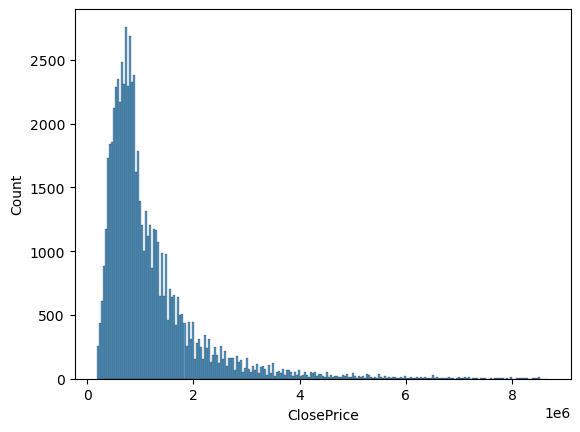

In [3]:
sns.histplot(x='ClosePrice', data=train);

The distribution of ClosePrice is right-skewed. What if we log the values of ClosePrice?

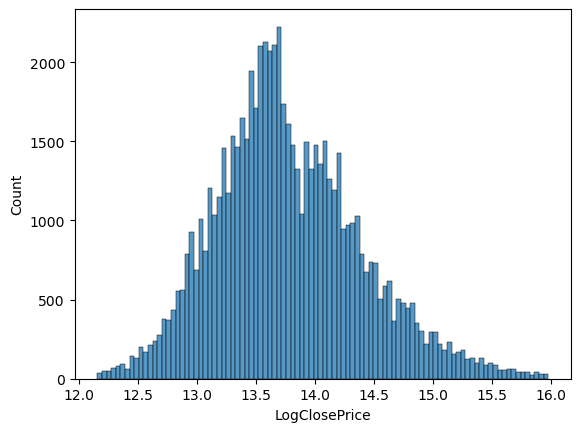

In [4]:
# Create a column 'LogClosePrice' which is basically the natural log of the ClosePrice column
train['LogClosePrice'] = np.log(train['ClosePrice'])
sns.histplot(x='LogClosePrice', data=train); # Plots the distribution of the log of ClosePrice

The distribution of the log of ClosedPrice is relatively more normal.

`ClosePrice` or `LogClosePrice`: What is being predicted

All other variables: Predictors/Features

In [5]:
# Getting all the features
features = list(train.columns)
features.remove('ClosePrice') # removing what is to be predicted
features.remove('LogClosePrice')

In [6]:
# Dictionary of whether each feature is categorical or continuous

feature_types = {
    'ViewYN': 'categorical',
    'PoolPrivateYN': 'categorical',
    'CloseDate': 'categorical',  # treat as date or extract year/month
    'ClosePrice': 'continuous',
    'Latitude': 'continuous',
    'Longitude': 'continuous',
    'LivingArea': 'continuous',
    'MLSAreaMajor': 'categorical',
    'AttachedGarageYN': 'categorical',
    'ParkingTotal': 'continuous',  # small integers, could also be ordinal
    'LotSizeAcres': 'continuous',
    'YearBuilt': 'continuous',  # technically discrete, treat as numeric
    'BathroomsTotalInteger': 'continuous',  # small integers, can be ordinal
    'City': 'categorical',
    'BedroomsTotal': 'continuous',  # small integers, can be ordinal
    'FireplaceYN': 'categorical',
    'Stories': 'categorical',  # ordinal / few levels
    'Levels': 'categorical',   # ordinal / few levels
    'LotSizeArea': 'continuous',
    'NewConstructionYN': 'categorical',
    'GarageSpaces': 'continuous',  # small integers, can be ordinal
    'HighSchoolDistrict': 'categorical',
    'PostalCode': 'categorical',
    'AssociationFee': 'continuous',
    'LotSizeSquareFeet': 'continuous',
    'LogClosePrice': 'continuous'
}


## Running OLS models from statsmodel

- Determines dependent variable: ClosePrice or LogClosePrice
- Determines which feature we should include in the final linear regression baseline model through $R^2$ values on the training set

### Feature + Dependent Variable

In [7]:
# TAKES ~ 2 MINUTES TO RUN!!
# Finding the feature in the training set with the highest R^2 value
# What is predicted: ClosePrice

most_correlated_feature = None
highest_R2 = 0

for col in features:
    # Wrap categorical features in C() for statsmodels
    if feature_types[col] == 'categorical':
        formula = f'ClosePrice ~ C({col})'
    else:
        formula = f'ClosePrice ~ {col}'

    model = smf.ols(formula, data=train).fit()
    print(f'{col}: {model.rsquared:.4f}')

    if model.rsquared > highest_R2:
        highest_R2 = model.rsquared
        most_correlated_feature = col

print(f'\nMost correlated feature with ClosePrice: {most_correlated_feature}')
print(f'Highest R^2 value: {highest_R2:.4f}')


ViewYN: 0.0033
PoolPrivateYN: 0.0252
CloseDate: 0.0034
Latitude: 0.0000
Longitude: 0.0199
LivingArea: 0.3636
MLSAreaMajor: 0.4090
AttachedGarageYN: 0.0001
ParkingTotal: 0.0006
LotSizeAcres: 0.0001
YearBuilt: 0.0003
BathroomsTotalInteger: 0.3098
City: 0.5657
BedroomsTotal: 0.1210
FireplaceYN: 0.0457
Stories: 0.0372
Levels: 0.0610
LotSizeArea: 0.0011
NewConstructionYN: 0.0009
GarageSpaces: 0.0022
HighSchoolDistrict: 0.2239
PostalCode: 0.6445
AssociationFee: 0.0266
LotSizeSquareFeet: 0.0000

Most correlated feature with ClosePrice: PostalCode
Highest R^2 value: 0.6445


In [8]:
# TAKES ~ 2 MINUTES TO RUN!!
# Finding the feature in the training set with the highest R^2 value
# What is predicted: LogClosePrice

# feature_types = { ... }  # your dictionary from earlier

most_correlated_feature_log = None
highest_R2_log = 0

for col in features:
    # Wrap categorical features in C() for statsmodels
    if feature_types[col] == 'categorical':
        formula = f'LogClosePrice ~ C({col})'
    else:
        formula = f'LogClosePrice ~ {col}'

    model = smf.ols(formula, data=train).fit()
    print(f'{col}: {model.rsquared:.4f}')

    if model.rsquared > highest_R2_log:
        highest_R2_log = model.rsquared
        most_correlated_feature_log = col

print(f'\nMost correlated feature with LogClosePrice: {most_correlated_feature_log}')
print(f'Highest R^2 value: {highest_R2_log:.4f}')


ViewYN: 0.0011
PoolPrivateYN: 0.0296
CloseDate: 0.0043
Latitude: 0.0016
Longitude: 0.0272
LivingArea: 0.3260
MLSAreaMajor: 0.4690
AttachedGarageYN: 0.0001
ParkingTotal: 0.0008
LotSizeAcres: 0.0000
YearBuilt: 0.0036
BathroomsTotalInteger: 0.2849
City: 0.6917
BedroomsTotal: 0.1470
FireplaceYN: 0.0672
Stories: 0.0517
Levels: 0.0757
LotSizeArea: 0.0007
NewConstructionYN: 0.0029
GarageSpaces: 0.0031
HighSchoolDistrict: 0.3253
PostalCode: 0.7621
AssociationFee: 0.0179
LotSizeSquareFeet: 0.0000

Most correlated feature with LogClosePrice: PostalCode
Highest R^2 value: 0.7621


In [15]:
# Evaluates to see whether ClosePrice or LogClosePrice should be the dependent variable and what is the best feature
best_feat_results = pd.DataFrame({'DV': ['ClosePrice', 'LogClosePrice'], 
                                   'Most Correlated Feature': [most_correlated_feature, most_correlated_feature_log], 
                                   'R^2 Value':[highest_R2, highest_R2_log]})
best_feat = best_feat_results[best_feat_results['R^2 Value'] == best_feat_results['R^2 Value'].max()]['Most Correlated Feature'].iloc[0]
dep_var = best_feat_results[best_feat_results['R^2 Value'] == best_feat_results['R^2 Value'].max()]['DV'].iloc[0]

# features.remove(best_feat)

print(f'First Feature: {best_feat}\nDependent Variable: {dep_var}')

First Feature: PostalCode
Dependent Variable: LogClosePrice


Dependent variable of LogClosedPrice and first feature of PostalCode gives us the highest $R^2$ value of 0.7620903749132477 on the training set.


## Used Sklearn to Create Linear Regression Baseline Model 

Linear Regression Baseline takes in the feature that is has the **highest** $R^2$ value when `LogClosePrice` is the dependent variable.

In [16]:
# Just replace best_feat with 'PostalCode', so that you don't need to run everything again!!
X = pd.get_dummies(train[[best_feat]], drop_first=True)
y = train['LogClosePrice']
baseline_model = LinearRegression().fit(X, y)

baseline_model is what's going to be evaluated.

#END: VIVIAN LIN